In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

In [2]:
# Load the dataset
data = pd.read_csv('Road_Traffic_Accident_Determinant_Factor_Identification_Data.csv')

In [3]:
# Display the first few rows of the dataset
data.head()


,Unnamed: 0,index,0,1,2,3,4,5,6,7,...,9,10,11,12,13,14,15,16,17,18
0,1,Attribute,Month,Time,Date of the week,Driver sex,Driver age,Educational background,License grade,Type of vehicle,...,Vehicle service year,City,Year,Cause of accident,Injury,Injury age,Injury occuption,No of injury person,No of injury male,No of injury female
1,4,Unnamed: 4,1,1/08:30,Thursday,Male,26,10th,Truck III,Turbo truck,...,2010,Bichena,2011,Failure to give priority to pedestrians,Serious injury,24,Farmer,1,1,0
2,5,Unnamed: 5,1,1/10:00,Thursday,Male,32,10th,Truck I,Isuzu truck,...,2010,Motta,2011,Speed,Simple injury,32,Farmer,1,0,1
3,6,Unnamed: 6,1,1/14:25,Thursday,Male,35,Degree,Public transport I,Hilux toyota,...,2010,D/Markos,2011,Speed,Death,20,Student,1,0,1
4,7,Unnamed: 7,1,1/15:00,Thursday,Male,26,10th,Public transport I,Abadula,...,2010,Awabel,2011,Carelessness,Death,16,Student,1,1,0


In [4]:
data.describe()

,Unnamed: 0
count,1536.000000
mean,770.498698
std,443.551578
min,1.000000
25%,386.750000
50%,770.500000
75%,1154.250000
max,1538.000000


In [5]:
# Drop unnecessary columns
data_clean = data.drop(columns=['Unnamed: 0', 'index','3','2','1','0','5','8','9','10','11','15','16','17','18'])

In [6]:
# Identify categorical and numerical columns
categorical_cols = [col for col in data_clean.columns if data_clean[col].dtype == 'object' and col != '13']
numerical_cols = [col for col in data_clean.columns if data_clean[col].dtype != 'object']

In [7]:
# Calculate the correlation matrix for numerical columns only
correlation_matrix = data_clean[numerical_cols].corr()

In [8]:
# Define preprocessing steps
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

In [9]:
# Define the target and features
X = data_clean.drop(columns=['13'])
y = data_clean['13']

In [10]:
X.head()

,4,6,7,12,14
0,Driver age,License grade,Type of vehicle,Cause of accident,Injury age
1,26,Truck III,Turbo truck,Failure to give priority to pedestrians,24
2,32,Truck I,Isuzu truck,Speed,32
3,35,Public transport I,Hilux toyota,Speed,20
4,26,Public transport I,Abadula,Carelessness,16


In [11]:
y.head()

0            Injury
1    Serious injury
2     Simple injury
3             Death
4             Death
Name: 13, dtype: object

In [12]:
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [13]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [14]:
X_train.head()

,4,6,7,12,14
845,27,Public transport I,Abadula,Failure to give priority to pedestrians,32
1346,32,Public transport I,Abadula,Speed,13/14
81,32,Public transport I,Public isuzu,Failure to give priority to pedestrians,21
1438,23,Public transport I,Abadula,Carelessness,25
374,31,Truck II,Sinotruk,Failure to give priority to pedestrians,12


In [15]:
X_test.head()

,4,6,7,12,14
1159,36,Public transport I,Truck,Speed,32
76,28,Taxi I,Bajaj,Carelessness,14
316,31,Taxi I,Bajaj,Speed,28
1040,19,Public transport I,Public isuzu,Speed,32
1357,43,Public transport I,Public isuzu,Sudden turn,43


In [16]:
# Apply preprocessing to the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'SVM': SVC(random_state=42),
}

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate each model
results = []
for model_name, model in models.items():
    model.fit(X_train_preprocessed, y_train)
    y_pred = model.predict(X_test_preprocessed)
    y_train_pred = model.predict(X_train_preprocessed)

    # Calculate metrics for the test set
    test_accuracy = accuracy_score(y_test, y_pred)
    test_f1 = f1_score(y_test, y_pred, average='weighted')
    test_precision = precision_score(y_test, y_pred, average='weighted')
    test_recall = recall_score(y_test, y_pred, average='weighted')

    # Calculate metrics for the training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    train_precision = precision_score(y_train, y_train_pred, average='weighted')
    train_recall = recall_score(y_train, y_train_pred, average='weighted')

    results.append({
        'Model': model_name,
        'Train Accuracy': train_accuracy,
        'Train F1 Score': train_f1,
        'Train Precision': train_precision,
        'Train Recall': train_recall,
        'Test Accuracy': test_accuracy,
        'Test F1 Score': test_f1,
        'Test Precision': test_precision,
        'Test Recall': test_recall
    })

results_df = pd.DataFrame(results)
print(results_df)

C:\Users\ehash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ehash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ehash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ehash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedM

                 Model  Train Accuracy  Train F1 Score  Train Precision  \
0  Logistic Regression        0.819218        0.808984         0.820728   
1        Decision Tree        0.989414        0.989379         0.989447   
2        Random Forest        0.989414        0.989422         0.989444   
3  K-Nearest Neighbors        0.865635        0.859826         0.864667   
4                  SVM        0.903094        0.897301         0.905124   

   Train Recall  Test Accuracy  Test F1 Score  Test Precision  Test Recall  
0      0.819218       0.766234       0.749099        0.745980     0.766234  
1      0.989414       0.847403       0.844968        0.844349     0.847403  
2      0.989414       0.876623       0.872703        0.873634     0.876623  
3      0.865635       0.785714       0.769888        0.766337     0.785714  
4      0.903094       0.821429       0.799847        0.808638     0.821429  


C:\Users\ehash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ehash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
results_df.head()

,Model,Train Accuracy,Train F1 Score,Train Precision,Train Recall,Test Accuracy,Test F1 Score,Test Precision,Test Recall
0,Logistic Regression,0.819218,0.808984,0.820728,0.819218,0.766234,0.749099,0.745980,0.766234
1,Decision Tree,0.989414,0.989379,0.989447,0.989414,0.847403,0.844968,0.844349,0.847403
2,Random Forest,0.989414,0.989422,0.989444,0.989414,0.876623,0.872703,0.873634,0.876623
3,K-Nearest Neighbors,0.865635,0.859826,0.864667,0.865635,0.785714,0.769888,0.766337,0.785714
4,SVM,0.903094,0.897301,0.905124,0.903094,0.821429,0.799847,0.808638,0.821429


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Define hyperparameters for each model
param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__solver': ['liblinear']
    },
    'Decision Tree': {
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    'SVM': {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__gamma': [1, 0.1, 0.01, 0.001],
        'classifier__kernel': ['rbf']
    },
    'K-Nearest Neighbors': {
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__metric': ['euclidean', 'manhattan']
    }
}

# Perform hyperparameter tuning
best_models = {}
results = []
for name, model in zip(models.keys(), models.values()):
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])
    
    if name in param_grids:
        param_grid = param_grids[name]
        grid_search = GridSearchCV(pipe, param_grid, cv=10, n_jobs=-1, verbose=2)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        best_models[name] = best_model
        
        y_train_pred_best = best_model.predict(X_train)
        y_pred_best = best_model.predict(X_test)
    else:
        model.fit(X_train, y_train)
        y_train_pred_best = model.predict(X_train)
        y_pred_best = model.predict(X_test)
        best_models[name] = model
    
    # Calculate metrics for the test set
    test_accuracy_best = accuracy_score(y_test, y_pred_best)
    test_f1_best = f1_score(y_test, y_pred_best, average='weighted')
    test_precision_best = precision_score(y_test, y_pred_best, average='weighted')
    test_recall_best = recall_score(y_test, y_pred_best, average='weighted')
    
    # Calculate metrics for the training set
    train_accuracy_best = accuracy_score(y_train, y_train_pred_best)
    train_f1_best = f1_score(y_train, y_train_pred_best, average='weighted')
    train_precision_best = precision_score(y_train, y_train_pred_best, average='weighted')
    train_recall_best = recall_score(y_train, y_train_pred_best, average='weighted')
    
    results.append({
        'Model': name,
        'Train Accuracy': train_accuracy_best,
        'Train F1 Score': train_f1_best,
        'Train Precision': train_precision_best,
        'Train Recall': train_recall_best,
        'Test Accuracy': test_accuracy_best,
        'Test F1 Score': test_f1_best,
        'Test Precision': test_precision_best,
        'Test Recall': test_recall_best
    })
    

results_df = pd.DataFrame(results)
print(results_df)

C:\Users\ehash\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Fitting 10 folds for each of 5 candidates, totalling 50 fits


C:\Users\ehash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ehash\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Fitting 10 folds for each of 36 candidates, totalling 360 fits


C:\Users\ehash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ehash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ehash\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Fitting 10 folds for each of 108 candidates, totalling 1080 fits


C:\Users\ehash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ehash\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Fitting 10 folds for each of 16 candidates, totalling 160 fits


C:\Users\ehash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ehash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ehash\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Fitting 10 folds for each of 16 candidates, totalling 160 fits
                 Model  Train Accuracy  Train F1 Score  Train Precision  \
0  Logistic Regression        0.879479        0.877646         0.878018   
1        Decision Tree        0.989414        0.989379         0.989447   
2        Random Forest        0.989414        0.989418         0.989478   
3  K-Nearest Neighbors        0.989414        0.989384         0.989431   
4                  SVM        0.989414        0.989419         0.989455   

   Train Recall  Test Accuracy  Test F1 Score  Test Precision  Test Recall  
0      0.879479       0.782468       0.783984        0.786861     0.782468  
1      0.989414       0.847403       0.844968        0.844349     0.847403  
2      0.989414       0.889610       0.885307        0.887263     0.889610  
3      0.989414       0.866883       0.868582        0.873468     0.866883  
4      0.989414       0.870130       0.867539        0.866829     0.870130  


C:\Users\ehash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
results_df.head()

,Model,Train Accuracy,Train F1 Score,Train Precision,Train Recall,Test Accuracy,Test F1 Score,Test Precision,Test Recall
0,Logistic Regression,0.879479,0.877646,0.878018,0.879479,0.782468,0.783984,0.786861,0.782468
1,Decision Tree,0.989414,0.989379,0.989447,0.989414,0.847403,0.844968,0.844349,0.847403
2,Random Forest,0.989414,0.989418,0.989478,0.989414,0.889610,0.885307,0.887263,0.889610
3,K-Nearest Neighbors,0.989414,0.989384,0.989431,0.989414,0.866883,0.868582,0.873468,0.866883
4,SVM,0.989414,0.989419,0.989455,0.989414,0.870130,0.867539,0.866829,0.870130


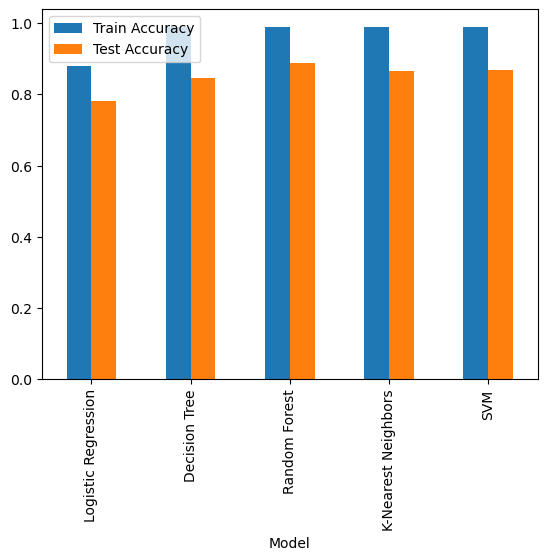

In [21]:
# @title Train vs Test Accuracy by Model

results_df.plot.bar(x='Model', y=['Train Accuracy', 'Test Accuracy'])
plt.savefig('final_accuracy.jpg',dpi=400)